<a href="https://colab.research.google.com/github/patilgauri005/Netflix-Genre-Classification/blob/main/Netflix_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [2]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)

Saving data.csv to data.csv


In [ ]:
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Drop useless columns if any
if 'id' in data.columns:
    data = data.drop(['id'], axis=1)
if 'Unnamed: 32' in data.columns:
    data = data.drop(['Unnamed: 32'], axis=1)

# Convert labels if needed
if 'diagnosis' in data.columns:
    data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})


In [ ]:
print(data.isnull().sum())
data = data.dropna()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
# Split Features + Target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train Logistic Regression
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



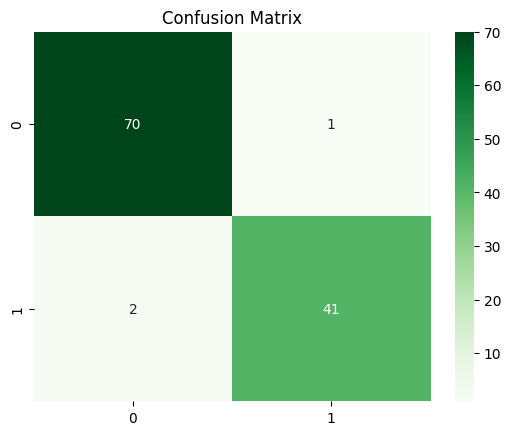

In [ ]:
# Evaluate Model
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens")
plt.title("Confusion Matrix")
plt.show()



<Figure size 600x400 with 0 Axes>

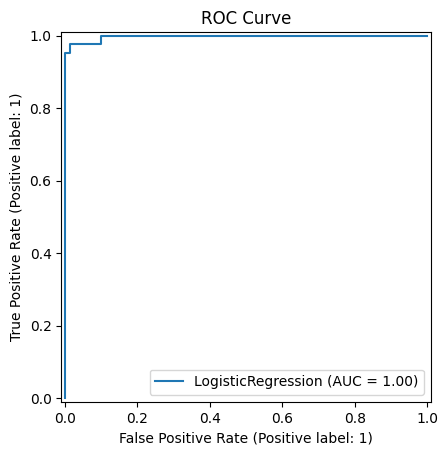

In [ ]:
# ROC curve (Receiver Operating Characteristic)

plt.figure(figsize=(6,4))
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title("ROC Curve")
plt.show()


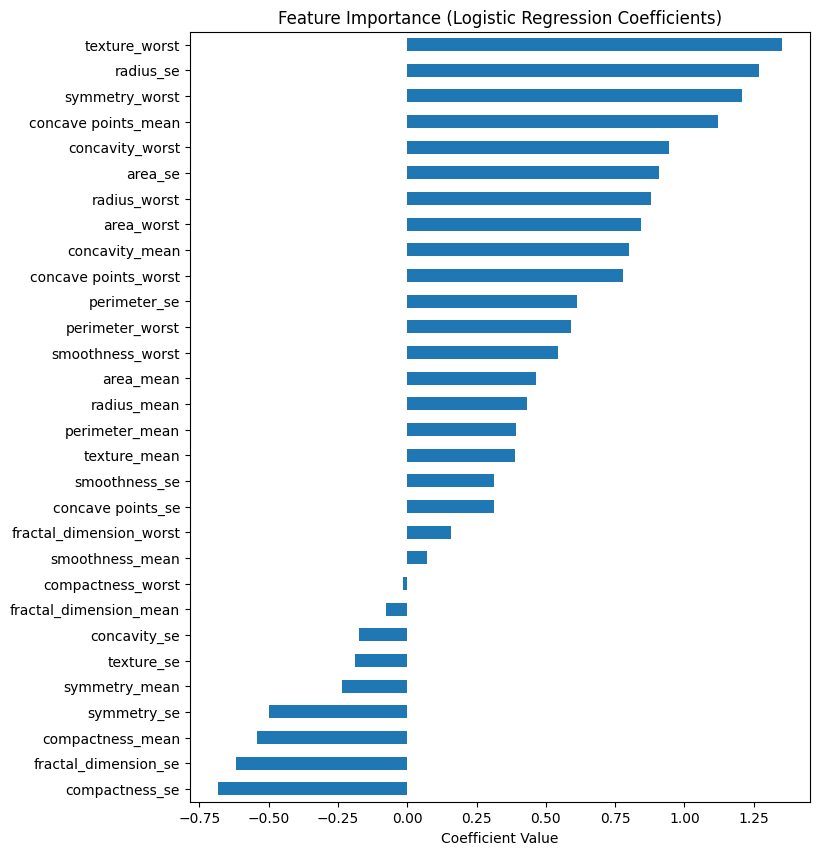

In [ ]:
# Feature Importance (Logistic Regression Coefficients)
coeff = model.coef_[0]
feature_importance = pd.Series(coeff, index=X.columns).sort_values()

plt.figure(figsize=(8,10))
feature_importance.plot(kind='barh')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.show()


In [ ]:
# Take the first row as example input
new_data = X.iloc[0].values.reshape(1, -1)

# Scale it
new_data_scaled = scaler.transform(new_data)

# Predict
pred = model.predict(new_data_scaled)[0]
probability = model.predict_proba(new_data_scaled)[0][1]

print("Prediction:", "Malignant - (The patient likely has breast cancer)" if pred == 1 else "Benign")
print("Probability of Malignancy - (The patient likely does NOT have breast cancer):", round(probability, 4))

Prediction: Malignant - (The patient likely has breast cancer)
Probability of Malignancy - (The patient likely does NOT have breast cancer): 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Create a dictionary for new sample data. You can modify these values.
# We'll start with the mean values of the training data as a base
# and then you can override specific features.
new_sample_data = X.mean().to_dict()

# Example: Setting specific values for radius_mean and texture_mean
new_sample_data['radius_mean'] = 18.0
new_sample_data['texture_mean'] = 25.0

# new_sample_data['perimeter_mean'] = 100.0
# new_sample_data['area_mean'] = 750.0

# Convert the dictionary to a pandas DataFrame, ensuring the order of features is correct
new_data_df = pd.DataFrame([new_sample_data])

# Scale the new data using the previously fitted scaler
new_data_scaled = scaler.transform(new_data_df)

# Predict the diagnosis
predicted_diagnosis = model.predict(new_data_scaled)[0]

# Get the probability of malignancy (class 1)
probability_malignancy = model.predict_proba(new_data_scaled)[0][1]

print(f"Predicted Diagnosis: {'Malignant - (The patient likely has breast cancer)' if predicted_diagnosis == 1 else 'Benign - (The patient likely does NOT have breast cancer)'}")
print(f"Probability of Malignancy: {probability_malignancy:.4f}")

Predicted Diagnosis: Malignant - (The patient likely has breast cancer)
Probability of Malignancy: 0.6593
